<a href="https://colab.research.google.com/github/mahanteshimath/DLT_HOME_WORK_Workshop-2.0/blob/main/MAHANTESH_Workshop_2_0_Part1_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework

Write a python script that will load data from the Jikan API (Unofficial MyAnimeList API) into DuckDB using dlt and complete the tasks.

Use:
- @dlt.sourse
- @dlt.resource
- @dlt.transformer

Jikan API URL: https://api.jikan.moe/v4

Docs: https://docs.api.jikan.moe/#section/Information

Endpoints for loading:
- [anime](https://docs.api.jikan.moe/#tag/anime/operation/getAnimeSearch)
- [characters](https://docs.api.jikan.moe/#tag/characters/operation/getCharactersSearch)
- [anime/{id}/reviews](https://docs.api.jikan.moe/#tag/anime/operation/getAnimeReviews)


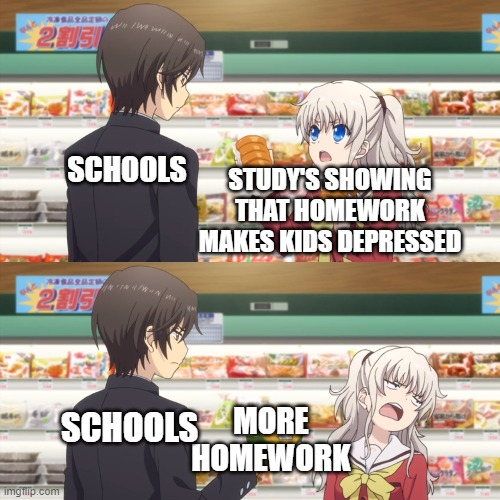

# Install dlt with duckdb extention

In [5]:
%%capture
!pip install dlt[duckdb]

# Play with API using requests library

In [6]:
import requests
response = requests.get("https://api.jikan.moe/v4/anime")
response.json()["data"][3]

{'mal_id': 7,
 'url': 'https://myanimelist.net/anime/7/Witch_Hunter_Robin',
 'images': {'jpg': {'image_url': 'https://cdn.myanimelist.net/images/anime/10/19969.jpg',
   'small_image_url': 'https://cdn.myanimelist.net/images/anime/10/19969t.jpg',
   'large_image_url': 'https://cdn.myanimelist.net/images/anime/10/19969l.jpg'},
  'webp': {'image_url': 'https://cdn.myanimelist.net/images/anime/10/19969.webp',
   'small_image_url': 'https://cdn.myanimelist.net/images/anime/10/19969t.webp',
   'large_image_url': 'https://cdn.myanimelist.net/images/anime/10/19969l.webp'}},
 'trailer': {'youtube_id': '7UkaILjPk8M',
  'url': 'https://www.youtube.com/watch?v=7UkaILjPk8M',
  'embed_url': 'https://www.youtube.com/embed/7UkaILjPk8M?enablejsapi=1&wmode=opaque&autoplay=1',
  'images': {'image_url': 'https://img.youtube.com/vi/7UkaILjPk8M/default.jpg',
   'small_image_url': 'https://img.youtube.com/vi/7UkaILjPk8M/sddefault.jpg',
   'medium_image_url': 'https://img.youtube.com/vi/7UkaILjPk8M/mqdefault.

In [7]:
import requests
response = requests.get("https://api.jikan.moe/v4/anime")
response.json()["data"][0]

{'mal_id': 1,
 'url': 'https://myanimelist.net/anime/1/Cowboy_Bebop',
 'images': {'jpg': {'image_url': 'https://cdn.myanimelist.net/images/anime/4/19644.jpg',
   'small_image_url': 'https://cdn.myanimelist.net/images/anime/4/19644t.jpg',
   'large_image_url': 'https://cdn.myanimelist.net/images/anime/4/19644l.jpg'},
  'webp': {'image_url': 'https://cdn.myanimelist.net/images/anime/4/19644.webp',
   'small_image_url': 'https://cdn.myanimelist.net/images/anime/4/19644t.webp',
   'large_image_url': 'https://cdn.myanimelist.net/images/anime/4/19644l.webp'}},
 'trailer': {'youtube_id': 'gY5nDXOtv_o',
  'url': 'https://www.youtube.com/watch?v=gY5nDXOtv_o',
  'embed_url': 'https://www.youtube.com/embed/gY5nDXOtv_o?enablejsapi=1&wmode=opaque&autoplay=1',
  'images': {'image_url': 'https://img.youtube.com/vi/gY5nDXOtv_o/default.jpg',
   'small_image_url': 'https://img.youtube.com/vi/gY5nDXOtv_o/sddefault.jpg',
   'medium_image_url': 'https://img.youtube.com/vi/gY5nDXOtv_o/mqdefault.jpg',
   'la

# Helper
Run the cell and ignore it.

In [8]:
from dlt.common.pipeline import LoadInfo

def assert_load_info(info: LoadInfo, expected_load_packages: int = 1) -> None:
    """Asserts that expected number of packages was loaded and there are no failed jobs"""
    assert len(info.loads_ids) == expected_load_packages
    # all packages loaded
    assert all(package.state == "loaded" for package in info.load_packages) is True
    # no failed jobs in any of the packages
    info.raise_on_failed_jobs()

# Task 1


- Create a pipeline for the API, for the next endpoints:
  - anime;
  - characters.

- Fill the empty lines in the functions below.
- Create a [resource](https://dlthub.com/docs/general-usage/resource#declare-a-resource) for the `characters` endpoint from scratch.
- Group them in `dlt.source`.
- [Run the pipeline](https://dlthub.com/docs/walkthroughs/run-a-pipeline) without errors.

In [9]:
import time

import dlt
import requests


@dlt.resource(table_name="anime")
def get_anime():
    # put your code here
    url = f"https://api.jikan.moe/v4/anime"
    response = requests.get(url)
    # Check if the response status code is 200 to determine success of request
    if response.status_code == 200:
      anime_data = response.json()
      yield anime_data["data"]
    else:
      raise Exception(f"{response.status_code} {response.text}")

# put your code here
@dlt.resource(table_name="characters")
def get_characters():
    # put your code here
    url = f"https://api.jikan.moe/v4/characters"
    response = requests.get(url)
    # Check if the response status code is 200 to determine success of request
    if response.status_code == 200:
      characters_data = response.json()
      yield characters_data["data"]
    else:
      raise Exception(f"{response.status_code} {response.text}")

@dlt.source
def anime_data():
  return get_anime(), get_characters()

pipeline = dlt.pipeline(
    pipeline_name='anime_pipeline',
    destination='duckdb',
    dataset_name='anime_data',
    dev_mode=True
)

load_info = pipeline.run(anime_data())
print(load_info)
print(pipeline.last_trace.last_normalize_info)
assert_load_info(load_info)

Pipeline anime_pipeline load step completed in 1.63 seconds
1 load package(s) were loaded to destination duckdb and into dataset anime_data_20241017063110
The duckdb destination used duckdb:////content/anime_pipeline.duckdb location to store data
Load package 1729189871.170239 is LOADED and contains no failed jobs
Normalized data for the following tables:
- _dlt_pipeline_state: 1 row(s)
- anime: 25 row(s)
- anime__titles: 113 row(s)
- anime__producers: 80 row(s)
- anime__licensors: 31 row(s)
- anime__studios: 29 row(s)
- anime__genres: 79 row(s)
- anime__themes: 40 row(s)
- anime__title_synonyms: 25 row(s)
- anime__demographics: 17 row(s)
- characters: 25 row(s)
- characters__nicknames: 34 row(s)

Load package 1729189871.170239 is NORMALIZED and NOT YET LOADED to the destination and contains no failed jobs


Run the code below and
## Answer the Questions:
**1.1** How many tables were generated by dlt during the normalisation step (see "Normalized data for the following tables:")? Including tables created by dlt (e.g. `_dlt_pipeline_state`).

**1.2** What anime has the highest score?

In [10]:
print(len(pipeline.last_trace.last_normalize_info.asdict()["load_packages"][0]["jobs"]))

12


In [11]:
normalize_info = pipeline.last_trace.last_normalize_info

# Access the "load_packages" attribute instead of "normalized_data_info"
load_packages = normalize_info.asdict()["load_packages"]

# Extract table names from job data within load packages
table_names = [job["table_name"]
               for package in load_packages
               for job in package.get("jobs", [])]

# Print the number of tables
print(f"Number of tables generated during normalization: {len(table_names)}")

Number of tables generated during normalization: 12


Look at the data:

In [12]:

import duckdb
from google.colab import data_table
data_table.enable_dataframe_formatter()

# a database '.duckdb' was created in working directory so just connect to it
conn = duckdb.connect(f"{pipeline.pipeline_name}.duckdb")
conn.sql(f"SET search_path = '{pipeline.dataset_name}'")
stats_table = conn.sql("SELECT title_english, score FROM anime ORDER BY score DESC LIMIT 6;").df()
display(stats_table)

,title_english,score
0,Monster,8.88
1,Cowboy Bebop,8.75
2,One Piece,8.72
3,Berserk,8.59
4,Neon Genesis Evangelion: The End of Evangelion,8.55
5,Cowboy Bebop: The Movie,8.38


You could notice that we received only 1 page, only 25 records. But this endpoint has over 27k records in total (see below). To get all the pages you should use a pagination.

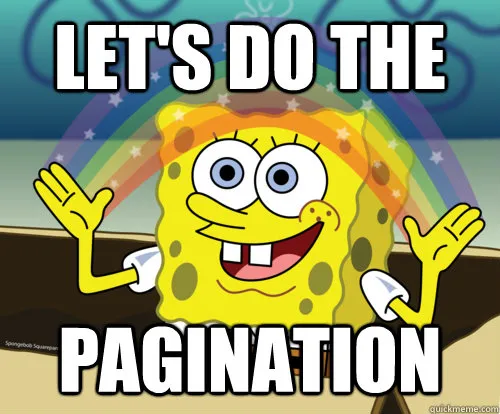

# Pagination

Play with requests, check out what pagination parameters you can use.

In [13]:
import requests
response = requests.get("https://api.jikan.moe/v4/anime")
response.json()['pagination']

{'last_visible_page': 1100,
 'has_next_page': True,
 'current_page': 1,
 'items': {'count': 25, 'total': 27500, 'per_page': 25}}

We can see that this endpoint has 27298 items in total.

Let's load only new anime released (with status "airing") in the last 3 month:

In [14]:
params = {
    "order_by": "start_date",
    "start_date": "2024-07-01",
    "status": "airing",
    "page": 1
}

response = requests.get("https://api.jikan.moe/v4/anime", params=params)
print(response.json()["pagination"])
print(response.json()["data"][0])

{'last_visible_page': 6, 'has_next_page': True, 'current_page': 1, 'items': {'count': 25, 'total': 145, 'per_page': 25}}
{'mal_id': 57945, 'url': 'https://myanimelist.net/anime/57945/Tasuuketsu', 'images': {'jpg': {'image_url': 'https://cdn.myanimelist.net/images/anime/1482/143629.jpg', 'small_image_url': 'https://cdn.myanimelist.net/images/anime/1482/143629t.jpg', 'large_image_url': 'https://cdn.myanimelist.net/images/anime/1482/143629l.jpg'}, 'webp': {'image_url': 'https://cdn.myanimelist.net/images/anime/1482/143629.webp', 'small_image_url': 'https://cdn.myanimelist.net/images/anime/1482/143629t.webp', 'large_image_url': 'https://cdn.myanimelist.net/images/anime/1482/143629l.webp'}}, 'trailer': {'youtube_id': 'NZU34NPoGLk', 'url': 'https://www.youtube.com/watch?v=NZU34NPoGLk', 'embed_url': 'https://www.youtube.com/embed/NZU34NPoGLk?enablejsapi=1&wmode=opaque&autoplay=1', 'images': {'image_url': 'https://img.youtube.com/vi/NZU34NPoGLk/default.jpg', 'small_image_url': 'https://img.you

# Task 2
- Add [pagination](https://www.getknit.dev/blog/api-pagination-best-practices) for endpoint `anime`.
- Add incremental loading for the resource `anime`. Use:
  - `aired.from` as a cursor,
  - `airing` status,
  - `merge` write disposition,
  - `mal_id` as a  primary key.
  - `dlt.sources.incremental`,
  - "2024-07-01T00:00:00+00:00" as `initial_value`.

- Run the pipeline without errors.

Read more about [incremental loading](https://dlthub.com/docs/general-usage/incremental-loading).


WARNING: This API has [Rate Limits](https://docs.api.jikan.moe/#section/Information/Rate-Limiting). Try to reduce the number of pages during the development.

In [15]:
from typing_extensions import ParamSpec
import time
import dlt
import requests

@dlt.resource(table_name = "anime", write_disposition = "append", primary_key= "mal_id")
def get_anime(
    aired_from= dlt.sources.incremental("aired.from",initial_value = "2024-07-01T00:00:00+00:00")
    ):
    print(f"start_val b4 loop: {aired_from.start_value}")
    # put your code here
    url = f"https://api.jikan.moe/v4/anime"
    params = {"start_date": aired_from.last_value[:10],
              "order_by": "start_date",
              "status": "airing",
              "page": 1}

    while True:
        # for debugging
        print(url)
        print(params)
        print(f"aired_from: {aired_from}")
        print(f"aired_from.initial_value: {aired_from.initial_value}")
        print(f"start_val inside loop: {aired_from.start_value}")
        print(f"aired_from.last_value: {aired_from.last_value}")

        time.sleep(1)

        response = requests.get(url,params=params)
        # trying to debug by printing response and status code if an exception occurs
        if response.status_code != 200:
            print(f"Error: {response.status_code} - {response.text}")
        else:
            print(response.json())


        response.raise_for_status()
        anime_data = response.json()["data"]

        for anime in anime_data:
          aired_date = anime.get("aired", {}).get("from")
          if aired_date is not None:
            print(f"anime_air_from_date: {aired_date}")
            yield anime # trying to yield each individual entry because I got the error that it can't find aired.from in JSON
          else:
            print("skipping record due to invalid aired.from time")

        pagination_data = response.json()["pagination"]
        if pagination_data.get("has_next_page", False):
            # Increment the page number
            params["page"] += 1
        else:
            break

pipeline = dlt.pipeline(
    pipeline_name='anime_pipeline',
    destination='duckdb',
    dataset_name='anime_data'
    #dev_mode=True,
)

load_info = pipeline.run(get_anime())
print(load_info)
print(pipeline.last_trace.last_normalize_info)
assert_load_info(load_info)

load_info = pipeline.run(get_anime())
print(load_info)
print(pipeline.last_trace.last_normalize_info)
assert_load_info(load_info, expected_load_packages=0)

start_val b4 loop: 2024-07-01T00:00:00+00:00
https://api.jikan.moe/v4/anime
{'start_date': '2024-07-01', 'order_by': 'start_date', 'status': 'airing', 'page': 1}
aired_from: Incremental at 0x7c7d0532ac50 for resource get_anime with cursor path: aired.from initial 2024-07-01T00:00:00+00:00 - None lv_func <built-in function max>
aired_from.initial_value: 2024-07-01T00:00:00+00:00
start_val inside loop: 2024-07-01T00:00:00+00:00
aired_from.last_value: 2024-07-01T00:00:00+00:00
{'pagination': {'last_visible_page': 6, 'has_next_page': True, 'current_page': 1, 'items': {'count': 25, 'total': 145, 'per_page': 25}}, 'data': [{'mal_id': 57945, 'url': 'https://myanimelist.net/anime/57945/Tasuuketsu', 'images': {'jpg': {'image_url': 'https://cdn.myanimelist.net/images/anime/1482/143629.jpg', 'small_image_url': 'https://cdn.myanimelist.net/images/anime/1482/143629t.jpg', 'large_image_url': 'https://cdn.myanimelist.net/images/anime/1482/143629l.jpg'}, 'webp': {'image_url': 'https://cdn.myanimelist.

## Answer the Questions:
**2.1.**  How many rows has `anime__genres` table?

**2.2** What anime has the highest score now?

In [17]:

import duckdb
from google.colab import data_table
data_table.enable_dataframe_formatter()

# a database '.duckdb' was created in working directory so just connect to it
conn = duckdb.connect(f"{pipeline.pipeline_name}.duckdb")
conn.sql(f"SET search_path = '{pipeline.dataset_name}'")
stats_table = conn.sql("SELECT title_english, score FROM anime_data_20241017063110.anime ORDER BY score DESC LIMIT 4;").df()
display(stats_table)

,title_english,score
0,Monster,8.88
1,Cowboy Bebop,8.75
2,One Piece,8.72
3,Berserk,8.59


# Task 3: Get reviews with dlt.transformer

- Use `@dlt.transformer` to get additional info for your data.

- Use endpoint `anime/{id}/reviews` to get reviews for anime endpoint from task 1 (one page, without pagination and incremental loading).
- Don't forget to handle Rate Limits errors.
- Run pipeline without errors.

Read more about dlt [transformers](https://dlthub.com/docs/general-usage/resource#process-resources-with-dlttransformer).

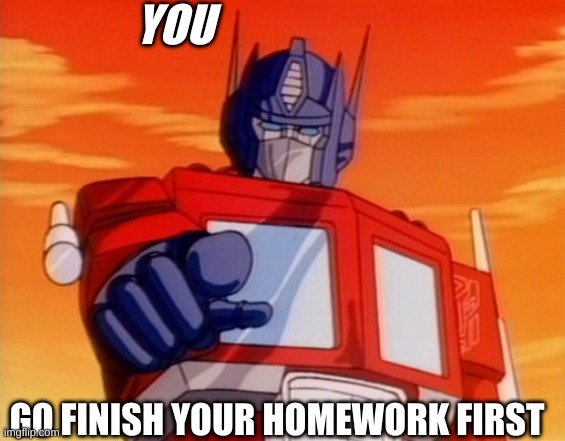

In [19]:
import time
import dlt
import requests

@dlt.resource(write_disposition="replace", selected=False)
def get_anime():
    print("in get_anime")
    # put your code here
    url = f"https://api.jikan.moe/v4/anime"
    response = requests.get(url)
    # Check if the response status code is 200 to determine success of request
    if response.status_code == 200:
      anime_data = response.json()
      yield anime_data["data"]
    else:
      raise Exception(f"{response.status_code} {response.text}")

@dlt.transformer(table_name="anime_reviews")
def get_reviews(anime):
    print("in get_reviews")
    # put your code here
    # use @dlt.defer for parallel execution of the thread
    @dlt.defer
    def _get_anime(_anime):
      review_url = f"https://api.jikan.moe/v4/anime/{anime_id}/reviews"
      return requests.get(review_url).json()

    # calling the _get_anime method in for loop ensures
    # detailed extraction of the data for reviews
    for _anime in anime:
      anime_id = _anime["mal_id"]
      # To ensure I don't exceed rate limit on the API setting delay
      time.sleep(1)
      yield _get_anime(anime_id)


pipeline = dlt.pipeline(
    pipeline_name='anime_pipeline',
    destination='duckdb',
    dataset_name='anime_data_tr',
    dev_mode=True,
)

# The output of get_anime goes as input to get_review
data = get_anime | get_reviews

load_info = pipeline.run(data())
print(load_info)
print(pipeline.last_trace.last_normalize_info)
assert_load_info(load_info)

in get_anime
in get_reviews
Pipeline anime_pipeline load step completed in 1.09 seconds
1 load package(s) were loaded to destination duckdb and into dataset anime_data_tr_20241017063747
The duckdb destination used duckdb:////content/anime_pipeline.duckdb location to store data
Load package 1729190267.1720738 is LOADED and contains no failed jobs
Normalized data for the following tables:
- _dlt_pipeline_state: 1 row(s)
- anime_reviews: 25 row(s)
- anime_reviews__data: 425 row(s)
- anime_reviews__data__tags: 437 row(s)

Load package 1729190267.1720738 is NORMALIZED and NOT YET LOADED to the destination and contains no failed jobs


Run the code below and

## Answer the Questions:

**3.1** How many tables were generated by dlt during the normalisation step (see "Normalized data for the following tables:")? Including tables created by dlt (e.g. `_dlt_pipeline_state`).

**3.2** As you can see below, Archaeon got the most overall reactions.
Which username took second place?

In [20]:

import duckdb
from google.colab import data_table
data_table.enable_dataframe_formatter()

# a database '.duckdb' was created in working directory so just connect to it
conn = duckdb.connect(f"{pipeline.pipeline_name}.duckdb")
conn.sql(f"SET search_path = '{pipeline.dataset_name}'")
# list all tables
display(conn.sql("DESCRIBE"))

# in the SQL query I was getting binding error and that it can't find user__username
# I checked the output and it turns out user__username is in the sub table anime_reviews__data
# So, I changed anime_review to anime_reviews__data
stats_table = conn.sql("SELECT user__username, reactions__overall, review FROM anime_reviews__data ORDER BY reactions__overall DESC LIMIT 5;").df()
print(stats_table.columns)
display(stats_table)


┌────────────────┬──────────────────────────────┬───────────────────────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┬─────────────────────────────────────

Index(['user__username', 'reactions__overall', 'review'], dtype='object')


,user__username,reactions__overall,review
0,Archaeon,3340,Since so many people have requested this over ...
1,TheLlama,2233,People who know me know that I'm not a fan of ...
2,CitizenGeek,1961,Note: this review is spoiler free. Hugely expe...
3,TheCriticsClub,1956,Monster plays out like a macabre game of cat a...
4,Polyphemus,1602,Cowboy Bebop is one of those series that is ju...


In [27]:

import duckdb
from google.colab import data_table
data_table.enable_dataframe_formatter()

# a database '.duckdb' was created in working directory so just connect to it
conn = duckdb.connect(f"{pipeline.pipeline_name}.duckdb")
conn.sql(f"SET search_path = '{pipeline.dataset_name}'")
# list all tables
display(conn.sql("DESCRIBE"))


stats_table = conn.sql("SELECT user__username, reactions__overall, review FROM anime_data_tr_20241017063747.anime_reviews__data ORDER BY reactions__overall DESC LIMIT 5;").df()
print(stats_table.columns)
display(stats_table)


┌────────────────┬──────────────────────────────┬───────────────────────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┬─────────────────────────────────────

Index(['user__username', 'reactions__overall', 'review'], dtype='object')


,user__username,reactions__overall,review
0,Archaeon,3340,Since so many people have requested this over ...
1,TheLlama,2233,People who know me know that I'm not a fan of ...
2,CitizenGeek,1961,Note: this review is spoiler free. Hugely expe...
3,TheCriticsClub,1956,Monster plays out like a macabre game of cat a...
4,Polyphemus,1602,Cowboy Bebop is one of those series that is ju...


In [23]:
import duckdb
from google.colab import data_table
data_table.enable_dataframe_formatter()

# a database '<pipeline_name>.duckdb' was created in working directory so just connect to it
conn = duckdb.connect(f"{pipeline.pipeline_name}.duckdb")
conn.sql(f"SET search_path = '{pipeline.dataset_name}'")
# list all tables
# display(conn.sql("DESCRIBE"))
stats_table = conn.sql("SELECT * FROM anime_data_20241017063110.anime__genres LIMIT 5;").df()


# stats_table = conn.sql("SELECT user__username, reactions__overall, review FROM anime_data_20241017063110.anime__genres ORDER BY reactions__overall DESC LIMIT 5;").df()
print(stats_table.columns)

Index(['mal_id', 'type', 'name', 'url', '_dlt_parent_id', '_dlt_list_idx',
       '_dlt_id'],
      dtype='object')


# Bonus
There are no tasks, just a top 5 Anime according to
 MyAnimeList database 😉

In [24]:
import time

import dlt
import requests


@dlt.resource(table_name="top_anime")
def get_top_anime():
    response = requests.get("https://api.jikan.moe/v4/top/anime")
    yield response.json()["data"]


pipeline = dlt.pipeline(
    pipeline_name='anime_pipeline',
    destination='duckdb',
    dataset_name='anime_data',
    dev_mode=True,
)

load_info = pipeline.run(get_top_anime())
print(load_info)
print(pipeline.last_trace.last_normalize_info)


Pipeline anime_pipeline load step completed in 1.27 seconds
1 load package(s) were loaded to destination duckdb and into dataset anime_data_20241017064111
The duckdb destination used duckdb:////content/anime_pipeline.duckdb location to store data
Load package 1729190471.8752818 is LOADED and contains no failed jobs
Normalized data for the following tables:
- _dlt_pipeline_state: 1 row(s)
- top_anime: 25 row(s)
- top_anime__titles: 152 row(s)
- top_anime__title_synonyms: 47 row(s)
- top_anime__producers: 127 row(s)
- top_anime__licensors: 24 row(s)
- top_anime__studios: 27 row(s)
- top_anime__genres: 70 row(s)
- top_anime__demographics: 18 row(s)
- top_anime__themes: 51 row(s)

Load package 1729190471.8752818 is NORMALIZED and NOT YET LOADED to the destination and contains no failed jobs


In [25]:
import duckdb
from google.colab import data_table
data_table.enable_dataframe_formatter()

# a database '<pipeline_name>.duckdb' was created in working directory so just connect to it
conn = duckdb.connect(f"{pipeline.pipeline_name}.duckdb")
conn.sql(f"SET search_path = '{pipeline.dataset_name}'")
stats_table = conn.sql("SELECT title_english, score FROM top_anime ORDER BY score DESC LIMIT 5;").df()
display(stats_table)

,title_english,score
0,Frieren: Beyond Journey's End,9.33
1,Fullmetal Alchemist: Brotherhood,9.09
2,Bleach: Thousand-Year Blood War - The Conflict,9.07
3,Steins;Gate,9.07
4,Attack on Titan Season 3 Part 2,9.05
